In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/neerajprasad209/Dataset/main/Raisin_Dataset/Raisin_Dataset.csv')

In [4]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 56.4 KB


In [11]:
df.shape

(900, 8)

In [5]:
df['Class'].value_counts()

Class
Kecimen    450
Besni      450
Name: count, dtype: int64

In [6]:
df['Class'] = df['Class'].map({'Kecimen':0, 'Besni':1})

In [7]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [8]:
df.tail()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,1
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,1
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,1
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,1
899,85609,512.081774,215.271976,0.907345,89197,0.632020,1272.862,1


# *Seperate the Independent And Dependent Variable* 

In [12]:
X = df.iloc[:,:-1]
y = df['Class']

In [13]:
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [16]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

# *Performing Train Test Spilt*

In [17]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest, ytrain,ytest  = train_test_split(X,y, test_size=0.25, random_state=42)

In [18]:
Xtrain.shape, Xtest.shape

((675, 7), (225, 7))

In [19]:
ytrain.shape, ytest.shape

((675,), (225,))

# *Traning The Model*

In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=2)

In [35]:
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(max_depth=2)

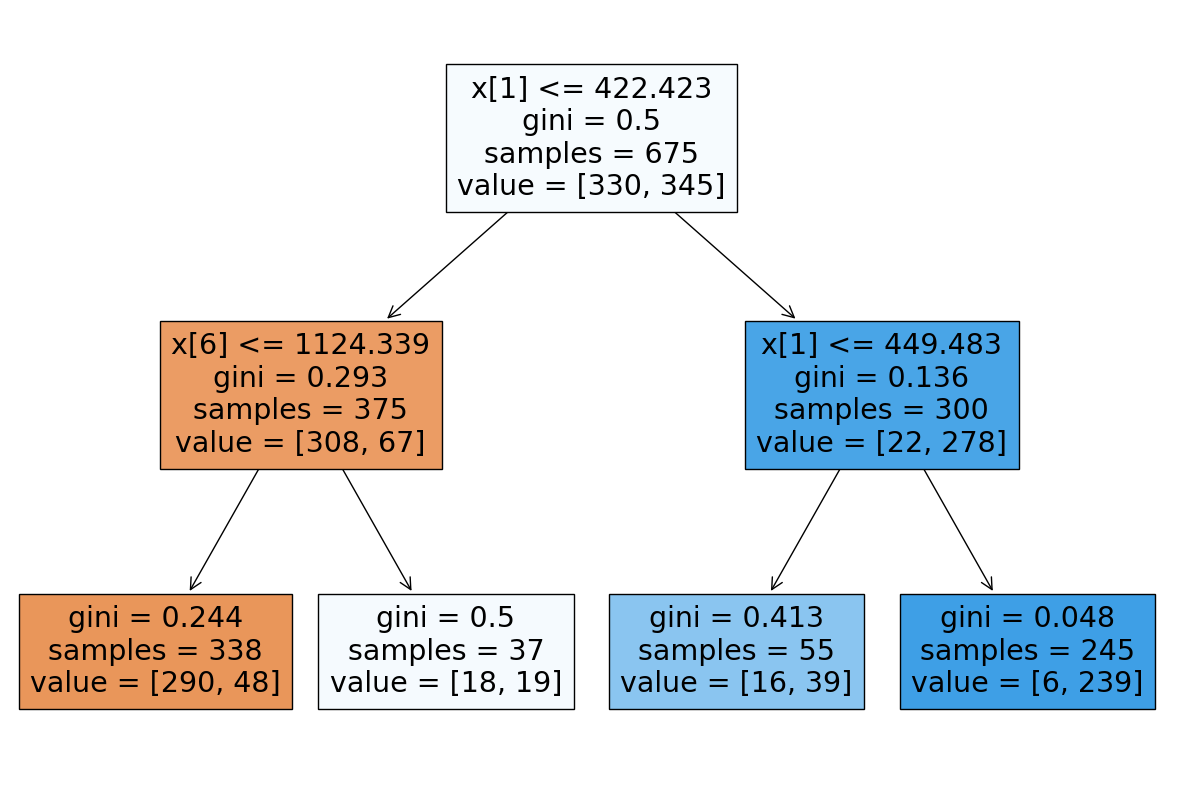

In [36]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(model,filled=True)
plt.show()

In [37]:
ypred = model.predict(Xtest)

In [39]:
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy Score :{accuracy_score(ypred,ytest)*100}")
print("\n=================================================================\n")
print(f"Accuracy Score :\n{classification_report(ypred,ytest)}")

Accuracy Score :85.33333333333334


Accuracy Score :
              precision    recall  f1-score   support

           0       0.81      0.91      0.85       107
           1       0.90      0.81      0.85       118

    accuracy                           0.85       225
   macro avg       0.86      0.86      0.85       225
weighted avg       0.86      0.85      0.85       225

